# 🚀 AI & ML Internship - Task 1: Data Cleaning & Preprocessing
## Dataset: Titanic Dataset
### 🎯 Objective:
To clean and preprocess the Titanic dataset for use in machine learning models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## 🗂 Step 1: Load & Explore the Dataset
Let's load the dataset and check for nulls, data types, and basic statistics.


In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🧼 Step 2: Handle Missing Values
We will:
- Fill missing `Age` with median.
- Fill missing `Embarked` with mode.
- Drop the `Cabin` column due to too many missing values.


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


## 🔡 Step 3: Encode Categorical Features
Convert `Sex` and `Embarked` columns into numerical using One-Hot Encoding.


In [7]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


## 📏 Step 4: Normalize Numerical Features
We'll standardize `Age` and `Fare` using `StandardScaler`.


In [8]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


## 📊 Step 5: Detect & Remove Outliers
Use IQR method on the `Fare` column to detect and remove outliers.


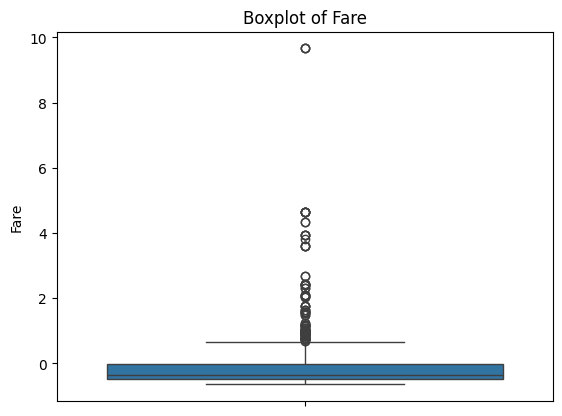

In [9]:
sns.boxplot(df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


## 💾 Step 6: Save Cleaned Dataset
We'll save the cleaned and preprocessed dataset as a new CSV file.


In [10]:
df.to_csv("titanic_cleaned.csv", index=False)
print("✅ Dataset saved as titanic_cleaned.csv")


✅ Dataset saved as titanic_cleaned.csv


## ✅ Conclusion:
- Missing values handled successfully.
- Applied encoding on categorical data.
- Scaled numerical features.
- Removed outliers using IQR method.
- Ready for ML modeling!

> 🔗 Now push this notebook, CSV file, and README to GitHub for submission.


## 📋 Final Checklist Before Submission

- [x] Data loaded and cleaned
- [x] Missing values handled
- [x] Categorical variables encoded
- [x] Features normalized/standardized
- [x] Outliers visualized and removed
- [x] Cleaned dataset saved
- [x] Notebook properly explained with markdowns


In [11]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

if missing_data.sum() == 0:
    print("Great! No missing values.")
else:
    print("Some columns still have missing values.")


Missing Data:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64
Great! No missing values.


In [12]:
# Check data types of all columns
print("Data Types:\n", df.dtypes)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [13]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


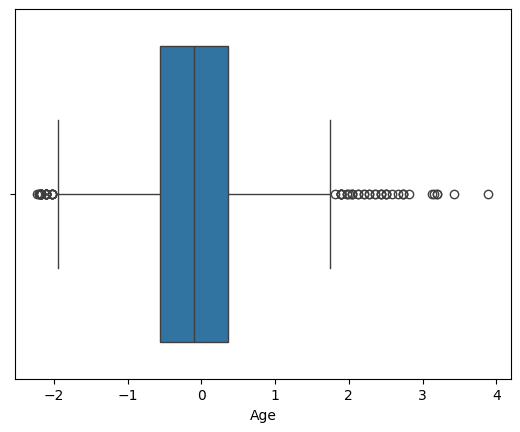

In [14]:
# Use boxplot to check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.show()


Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df_cleaned = df[(df['Age'] >= (Q1 - 1.5 * IQR)) & (df['Age'] <= (Q3 + 1.5 * IQR))]


In [16]:
# Check unique values in encoded columns
print("Unique values in 'Sex_male':", df['Sex_male'].unique())
print("Unique values in 'Embarked_Q':", df['Embarked_Q'].unique())
print("Unique values in 'Embarked_S':", df['Embarked_S'].unique())


Unique values in 'Sex_male': [ True False]
Unique values in 'Embarked_Q': [False  True]
Unique values in 'Embarked_S': [ True False]


In [17]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize 'Age' and 'Fare' columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Check if values are now in the correct range (mean = 0, std = 1)
print("Standardized 'Age' and 'Fare' columns:\n", df[['Age', 'Fare']].describe())


Standardized 'Age' and 'Fare' columns:
                 Age          Fare
count  7.750000e+02  7.750000e+02
mean  -1.833659e-17 -9.168293e-17
std    1.000646e+00  1.000646e+00
min   -2.217707e+00 -1.313411e+00
25%   -5.283213e-01 -7.315244e-01
50%   -5.861258e-02 -3.553671e-01
75%    4.110961e-01  6.026763e-01
max    4.012196e+00  3.476807e+00


In [18]:
# Check for any invalid values in 'Age' or 'Fare'
print("Check for invalid 'Age' values (e.g., negative):", df[df['Age'] < 0])
print("Check for invalid 'Fare' values (e.g., negative):", df[df['Fare'] < 0])


Check for invalid 'Age' values (e.g., negative):      PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
..           ...       ...     ...   
884          885         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   

                                                  Name       Age  SibSp  \
0                              Braund, Mr. Owen Harris -0.528321      1   
2                               Heikkinen, Miss. Laina -0.215182      0   
5                                     Moran, Mr. James -0.058613      0   
7                       Palsson, Master. Gosta Leonard -2.094017      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) -0.136897      0   
..                                          

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.024438 -0.045179  0.016537 -0.080426 -0.015117   
Survived       -0.024438  1.000000 -0.238532 -0.118009 -0.003156  0.098575   
Pclass         -0.045179 -0.238532  1.000000 -0.349607  0.113943  0.083451   
Age             0.016537 -0.118009 -0.349607  1.000000 -0.335000 -0.204181   
SibSp          -0.080426 -0.003156  0.113943 -0.335000  1.000000  0.410182   
Parch          -0.015117  0.098575  0.083451 -0.204181  0.410182  1.000000   
Fare            0.002942  0.234422 -0.589776  0.085716  0.370388  0.336844   

                 Fare  
PassengerId  0.002942  
Survived     0.234422  
Pclass      -0.589776  
Age          0.085716  
SibSp        0.370388  
Parch        0.336844  
Fare         1.000000  


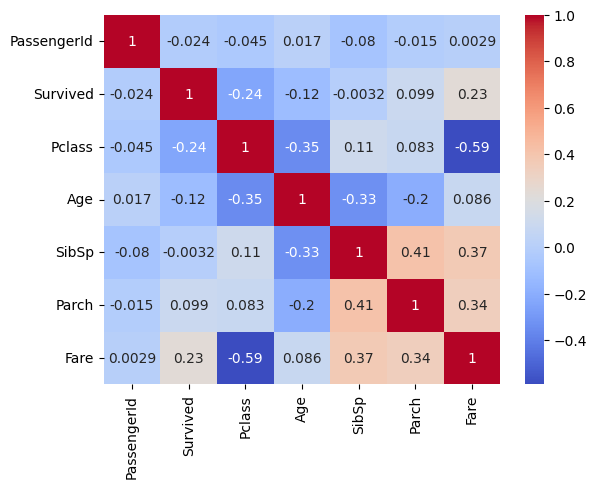

In [20]:
# Select only numeric columns for correlation
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_cols.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [23]:

print("Class distribution for 'Survived':\n", df['Survived'].value_counts())


Class distribution for 'Survived':
 Survived
0    512
1    263
Name: count, dtype: int64


In [22]:

print("Final Dataset Summary:")
print(df.info())
print(df.describe())


Final Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Ticket       775 non-null    object 
 8   Fare         775 non-null    float64
 9   Sex_male     775 non-null    bool   
 10  Embarked_Q   775 non-null    bool   
 11  Embarked_S   775 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
       PassengerId    Survived     Pclass           Age       SibSp  \
count   775.000000  775.000000  775.00000  7.750000e+02  775.000000   
mean    445.806452    0.339355    2.48000 -1.833659e-17    0.437419   